In [87]:
import os
import numpy as np
import pandas as pd
import zipfile 
import matplotlib.image as image
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt




In [88]:
"""def extract(file):
    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, 'r') as zip_ref:
        zip_ref.extractall(os.getcwd()+"/Pictures/")
extract("64.zip")
"""

'def extract(file):\n    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, \'r\') as zip_ref:\n        zip_ref.extractall(os.getcwd()+"/Pictures/")\nextract("64.zip")\n'

In [118]:
waldo_images = os.listdir(os.getcwd() + "/Pictures/64/Waldo")
notwaldo_images = os.listdir(os.getcwd() + "/Pictures/64/notwaldo")
X = []
y = [] 

for img in waldo_images:
    try:
        X.append(image.imread(os.getcwd() + "/Pictures/64/Waldo/" + str(img)))
        y.append(1)
    except:
        continue

for img in notwaldo_images:
    X.append(image.imread(os.getcwd() + "/Pictures/64/notwaldo/" + str(img)))
    y.append(0)
X = np.array(X)
y = np.column_stack(y).T
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, shuffle=True)

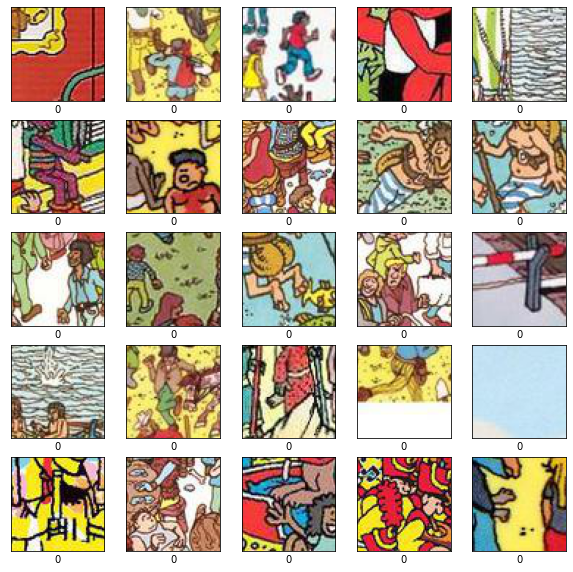

In [119]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i][0])
plt.show()


In [114]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)



Epoch 1/10


UnimplementedError:  Cast string to float is not supported
	 [[node Cast_1
 (defined at /Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/metrics.py:716)
]] [Op:__inference_train_function_64524]

Errors may have originated from an input operation.
Input Source operations connected to node Cast_1:
In[0] IteratorGetNext (defined at /Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:866)

Operation defined at: (most recent call last)
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 149, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
>>>     self.run()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2877, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2923, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3146, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-114-bf3cb14ff307>", line 17, in <module>
>>>     history = model.fit(X_train, y_train, epochs=10)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 817, in train_step
>>>     self.compiled_metrics.update_state(y, y_pred, sample_weight)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 460, in update_state
>>>     metric_obj.update_state(y_t, y_p, sample_weight=mask)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/utils/metrics_utils.py", line 73, in decorated
>>>     update_op = update_state_fn(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/metrics.py", line 177, in update_state_fn
>>>     return ag_update_state(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/metrics.py", line 716, in update_state
>>>     y_true = tf.cast(y_true, self._dtype)
>>> 

In [115]:
model.evaluate(X_val,  y_val, verbose=2)


UnimplementedError:  Cast string to float is not supported
	 [[node Cast_1
 (defined at /Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/metrics.py:716)
]] [Op:__inference_test_function_64713]

Errors may have originated from an input operation.
Input Source operations connected to node Cast_1:
In[0] IteratorGetNext (defined at /Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1355)

Operation defined at: (most recent call last)
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 149, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
>>>     self.run()
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2877, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2923, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3146, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-115-7b2c55b904a2>", line 1, in <module>
>>>     model.evaluate(X_val,  y_val, verbose=2)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1537, in evaluate
>>>     tmp_logs = self.test_function(iterator)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1366, in test_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1356, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1349, in run_step
>>>     outputs = model.test_step(data)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1307, in test_step
>>>     self.compiled_metrics.update_state(y, y_pred, sample_weight)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 460, in update_state
>>>     metric_obj.update_state(y_t, y_p, sample_weight=mask)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/utils/metrics_utils.py", line 73, in decorated
>>>     update_op = update_state_fn(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/metrics.py", line 177, in update_state_fn
>>>     return ag_update_state(*args, **kwargs)
>>> 
>>>   File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/metrics.py", line 716, in update_state
>>>     y_true = tf.cast(y_true, self._dtype)
>>> 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

model.evaluate(X_val,  y_val, verbose=2)


In [ ]:
"""
This is from https://github.com/ThomasADuffy/Whos-Waldo-Capstone-2/blob/master/images/plots_structures/Model_v1.jpg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=(.7,1.3),
    fill_mode='nearest')
i = 0
gen= datagen.flow_from_directory(
        os.getcwd() + "/Pictures/64/true",
        target_size=(64, 64),
        batch_size=1, color_mode='rgb',
    class_mode='binary', shuffle=True, interpolation='nearest',
    save_to_dir= os.getcwd() + "/Pictures/64/augmented",save_prefix="changed")
"""

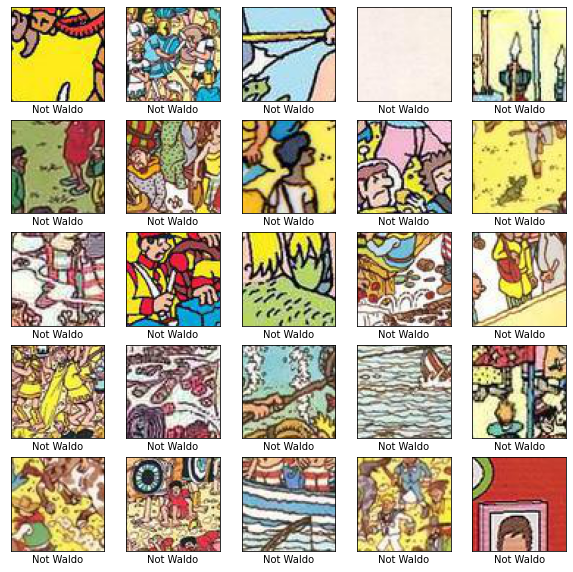

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()
